Generate variation analysis plots based off Adonis after applying Benjamini-Hochberg FDR correction. 

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
from statsmodels.stats.multitest import multipletests

In [109]:
results = pd.read_csv('gathered_results.txt', sep='\t')
results = results[results.category != 'state']

In [158]:
import numpy as np

def plotit(metric):
    xk = results[np.logical_and(results['#rare'] == 1250,
                                  results['metric'] == metric)]
    xk = xk.sort_values('r2', ascending=False)
    reject, corrected, _, _ = multipletests(xk.p, alpha=0.1, method='fdr_bh')
    xk['fdr-bh'] = corrected
    xk = xk[reject]

    fig = plt.figure(figsize=(10,10))
    for offset, r, c in zip([0.2, 0.4, 0.6], [1250,2500,5000], ['b', 'r', 'g']):
        subset = results[np.logical_and(results['#rare'] == r,
                                         results['metric'] == metric)].set_index('category')
        subset = subset.loc[xk.category]
        subset.loc[subset.r2.isnull(), 'r2'] = 0  # dont show if nan (ie not collected)

        _ = plt.barh(np.arange(20)[::-1] + offset, subset.r2[:20], height=0.2, color=c)
    ax = plt.gca()
    _ = ax.set_yticks(np.arange(20)[::-1] + 0.6)
    _ = ax.set_yticklabels(xk.category[:20], rotation=45, ha='right', va='top')
    plt.tick_params(axis='both', which='major', labelsize=12)
    _ = ax.legend(['depth 1250', 'depth 2500', 'depth 5000'], loc='lower right')
    _ = ax.set_xlabel('adonis r^2', fontsize=12)
    _ = ax.set_title('%s; adonis, Benjamini-Hochberg FDR alpha < 0.1' % metric)
    plt.tight_layout()
    plt.savefig("%s.pdf" % metric)
    return xk

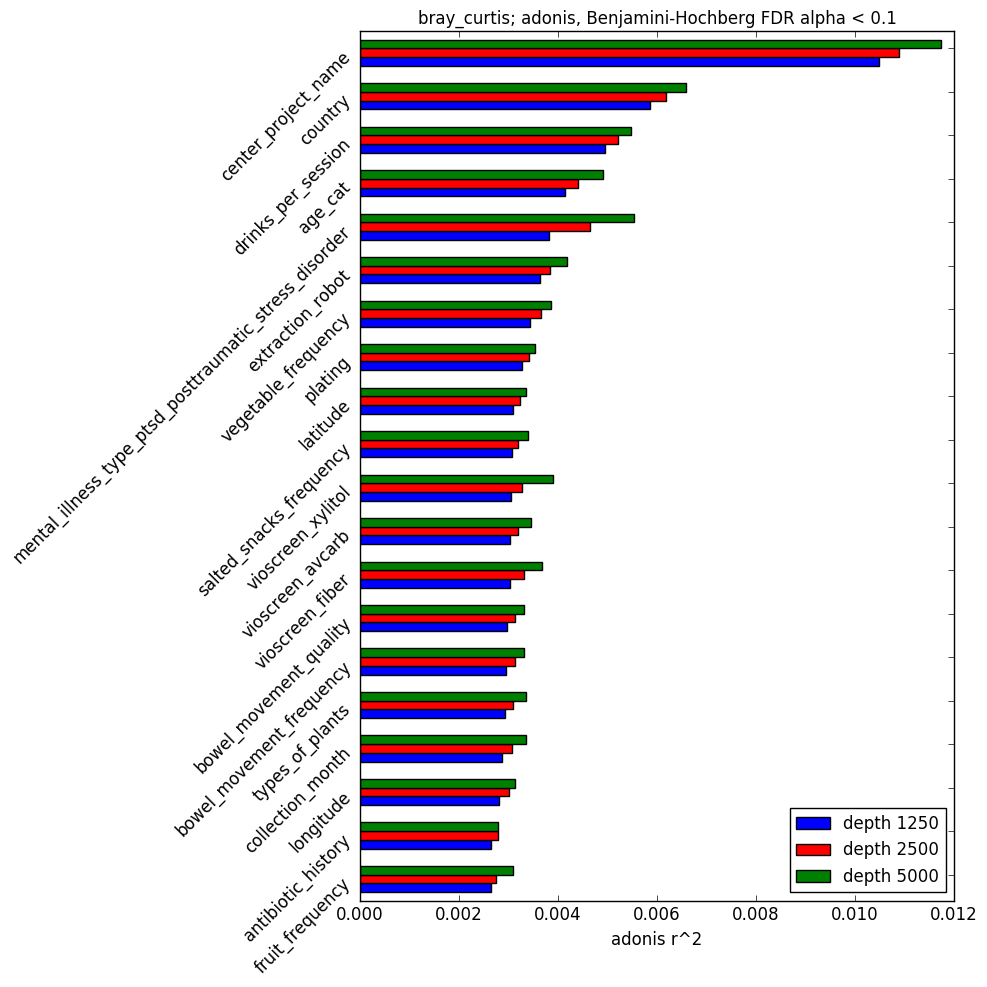

In [159]:
bc = plotit('bray_curtis')

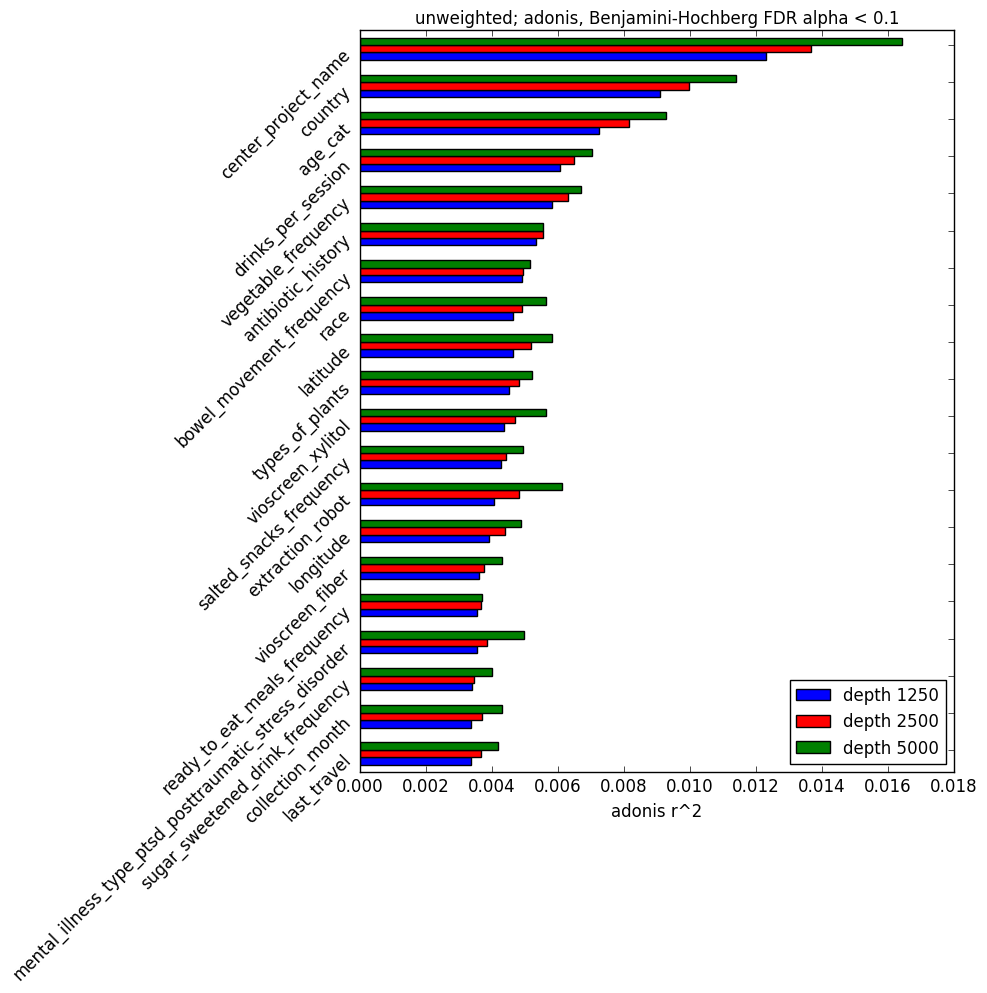

In [153]:
uw = plotit('unweighted')

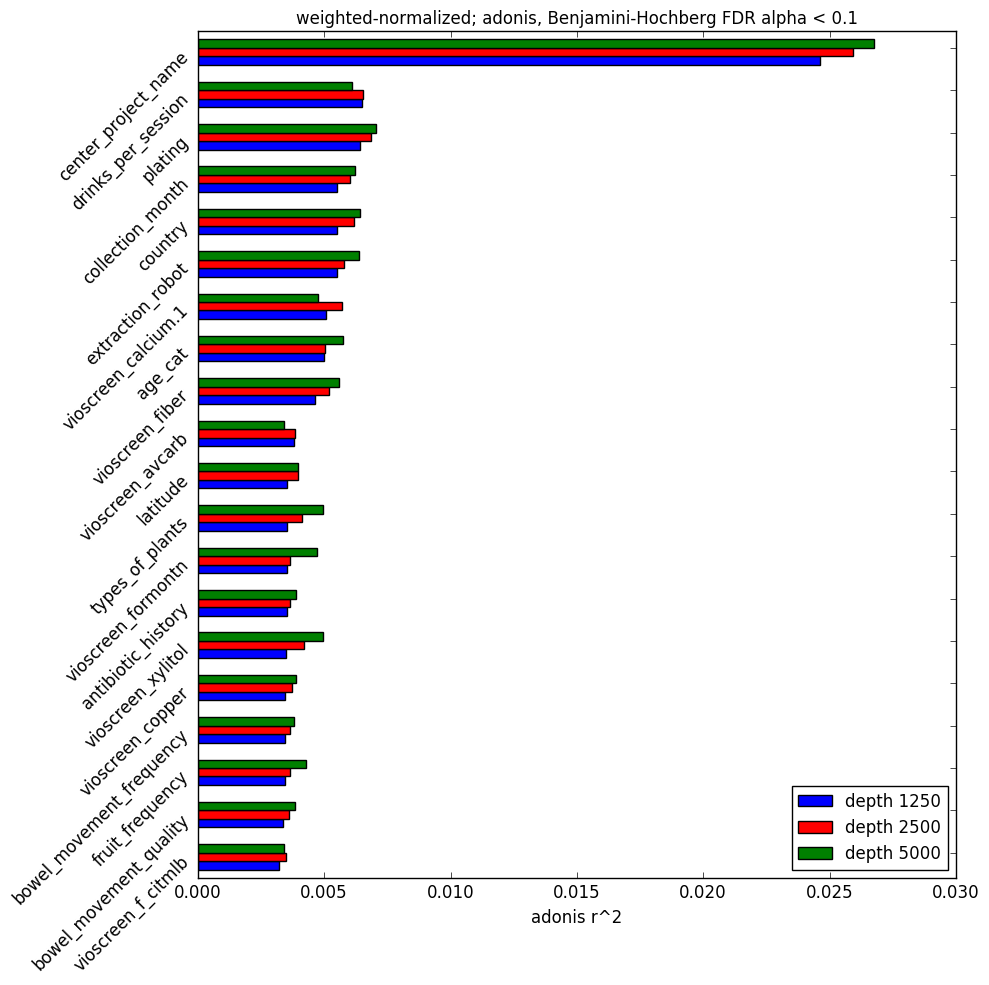

In [154]:
w = plotit('weighted-normalized')